# AMCAT Data analysis 

### 1. Importing libraries


In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### 2. Loading the dataset

In [12]:
df = pd.read_csv('/project_1/data.csv')

In [13]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [14]:
# droping the unnamed column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [16]:
print(df.columns)

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')


In [17]:
df.shape

(3998, 38)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

### 3. EDA in dataset
Here we check if there are any missing or duplicate value present in the dataset 

In [19]:
#finding out if there are any missing values in the dataset or not 
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [20]:
#checking of any duplicate value 
df.duplicated().sum()

0

In [22]:
#type conversion of dates 
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOB'] = pd.to_datetime(df['DOB'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_29356\1630597684.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ'] = pd.to_datetime(df['DOJ'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_29356\1630597684.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

#### Insight 1
   Here in the dataset some dataset were of incoorect type we converted the dataset to their correct type for further analysis 

## 4 . Univariate Analysis
   Here we analyze the data with the help of single feature or variable.

### Outliers detection in each numeric column using box plot

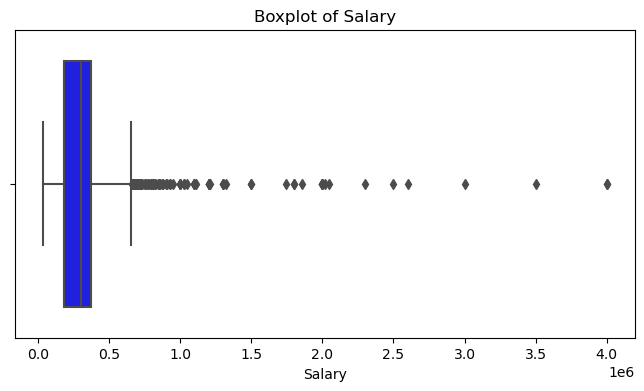

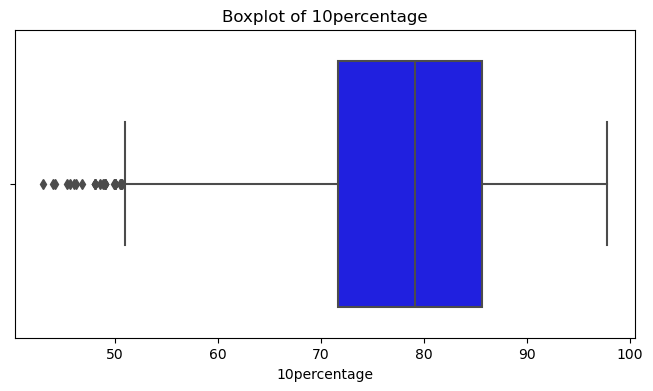

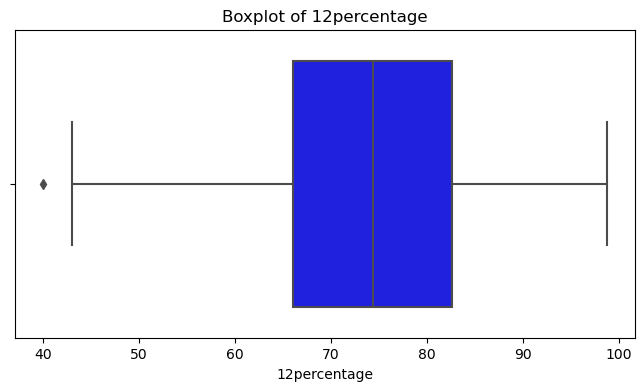

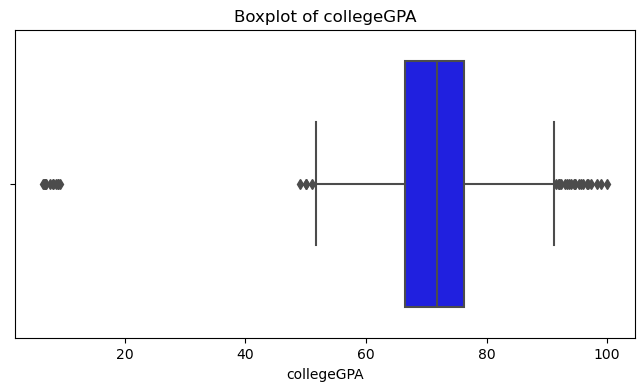

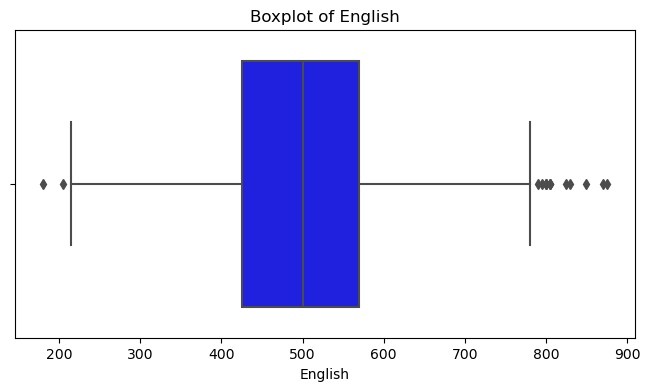

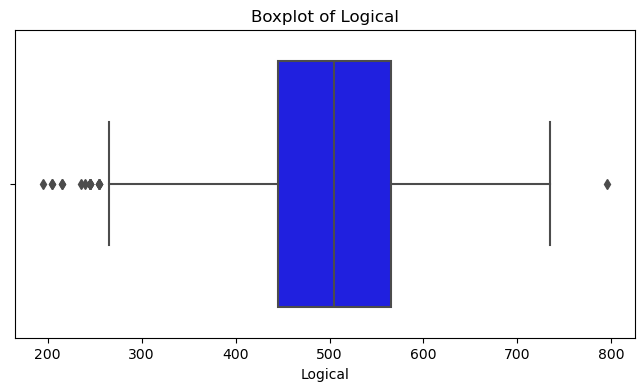

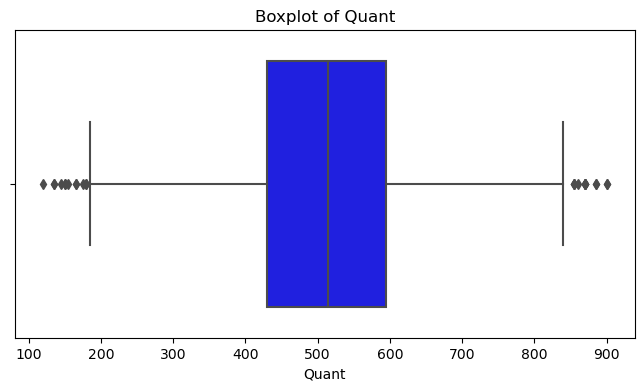

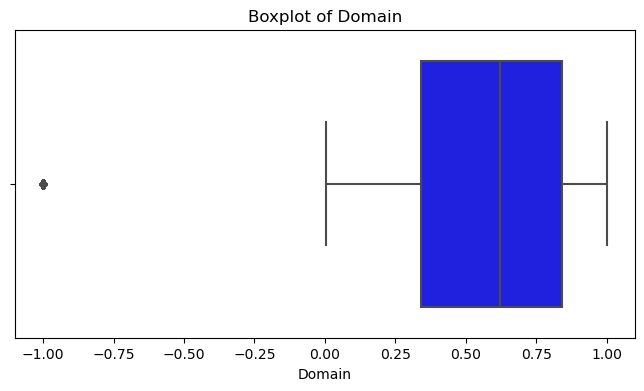

In [26]:
numerical_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [28]:
df['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


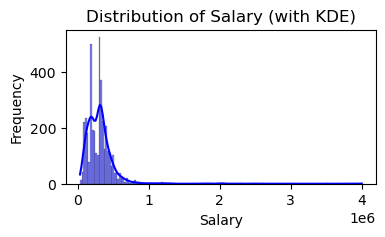

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


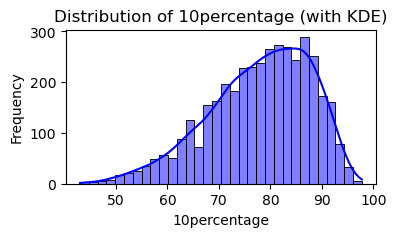

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


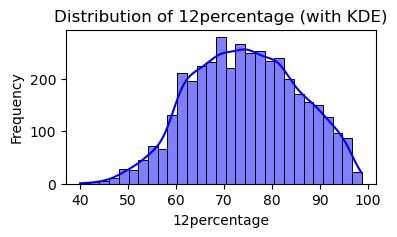

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


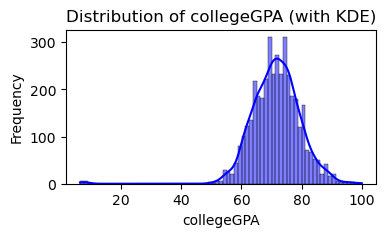

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


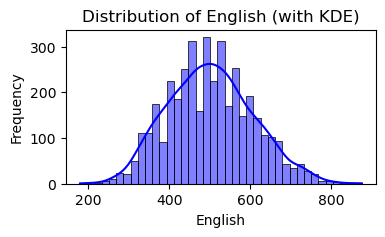

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


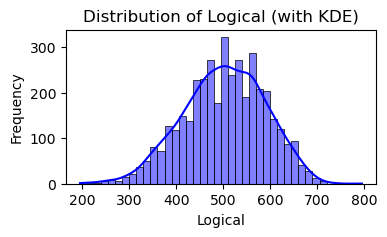

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


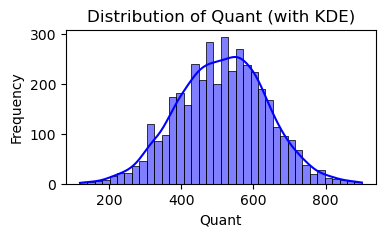

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


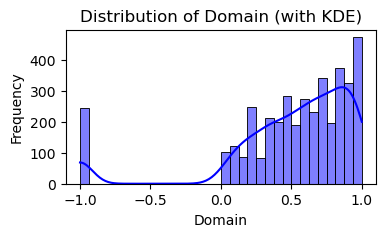

In [45]:
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col} (with KDE)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Insight2 : from  plots
 1. From the box plot we can analyze that CGPA of maximum students lies between 65-80.
 2. The CGPA distribution is skewed towards lower GPA slightly
 3. From salary we can analyze that slary of most individuals is een to be low-mid range i.e:0.5 to 1.5lakhs.
 4. The maximum slary is 4000000 and average salary is 307699.8




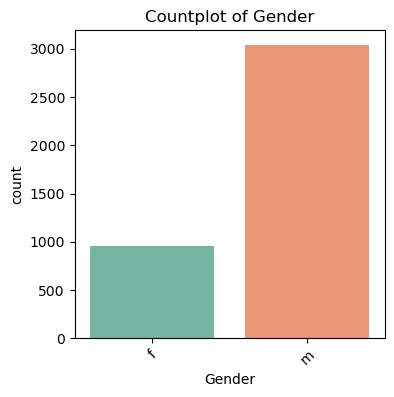

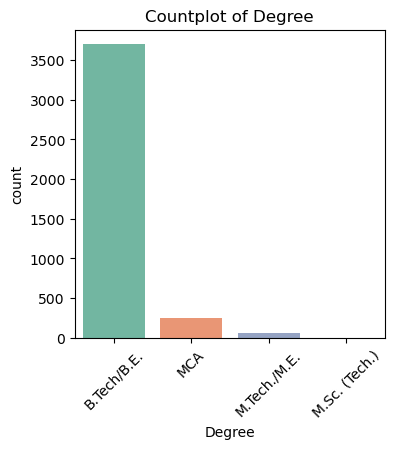

In [43]:
#for categorical columns 
categorical_cols = ['Gender',  'Degree']

for col in categorical_cols:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


#### For Specialization 


In [49]:
df["Specialization"].value_counts().head(12)

Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
Name: count, dtype: int64

In [57]:
ds=pd.DataFrame(df["Specialization"].value_counts().head(12))
ds.drop_duplicates(inplace=True)
ds

,count
Specialization,
electronics and communication engineering,880
computer science & engineering,744
information technology,660
computer engineering,600
computer application,244
mechanical engineering,201
electronics and electrical engineering,196
electronics & telecommunications,121
electrical engineering,82


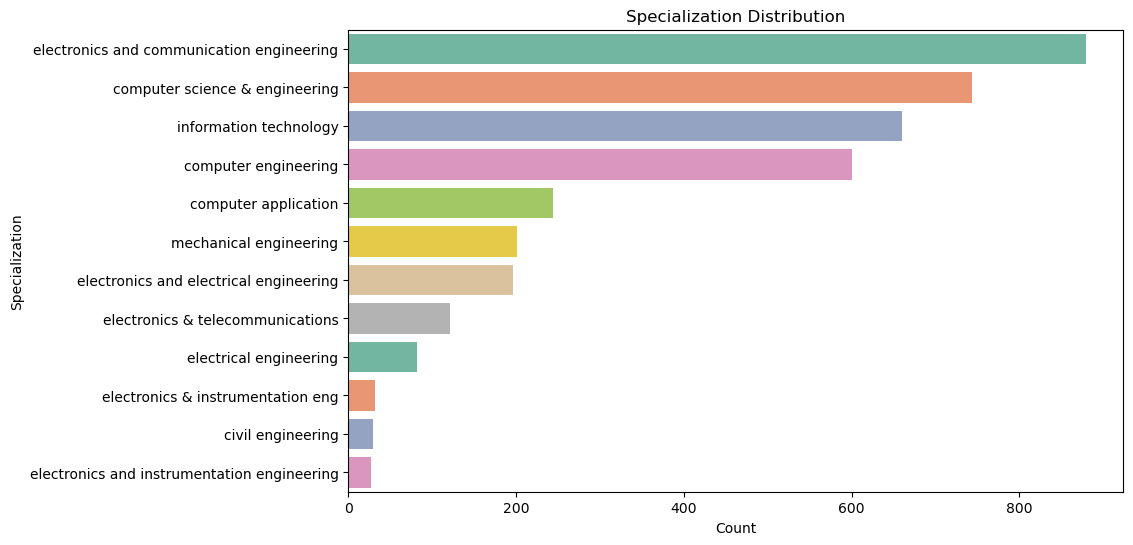

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(y=ds.index, x=ds["count"], palette='Set2')
plt.title("Specialization Distribution")
plt.xlabel("Count")
plt.ylabel("Specialization")
plt.show()

#### Insight 3
 1. We can conclude from counteplot that the population of male is thrice as compared to population of female
 2. We can also conclude that the maximum population are those with the degree of B.Tech/BE
 3. We can also observe that the population with the specialization of electronics and communication engineering is maximum and the miminum population is with the specialization of electronics and instrumentation engineering.

### 5. Bivariate Analysis
     Analysis using two features

#### Variation of CGPA with specialization

In [65]:
b1=df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA",ascending=False)
b1

,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


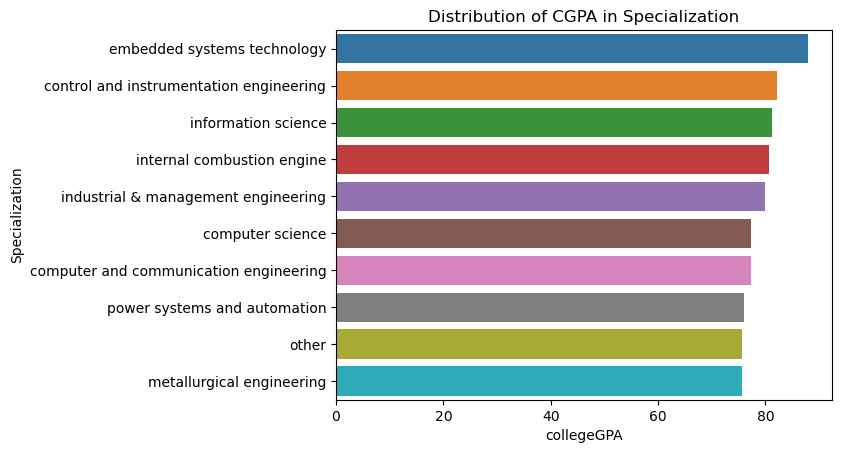

In [68]:
sns.barplot(y=b1.index[:10], x=b1["collegeGPA"][:10])
plt.title("Distribution of CGPA in Specialization")
plt.show()

#### Insight 4
1. Embedded Systems Technology specialization have higehr CGPA compared to other specilalization.
2. Metallurgical Engineering specialization have the lower CGPA compared to other specialization.

#### Relationship between CGPA and salary

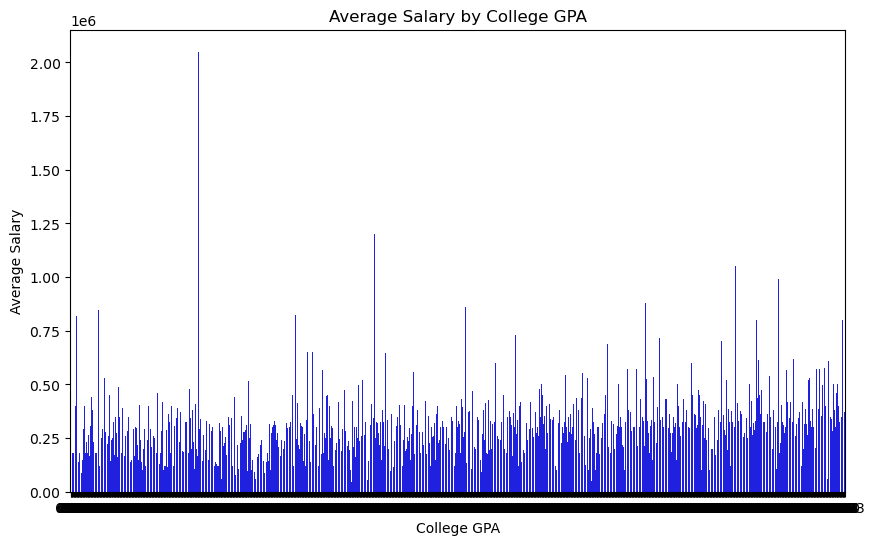

In [80]:
# Aggregate data: Mean salary for each GPA level
gpa_salary = df.groupby('collegeGPA')['Salary'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='collegeGPA', y='Salary', data=gpa_salary, color='blue')
plt.title('Average Salary by College GPA')
plt.xlabel('College GPA')
plt.ylabel('Average Salary')
plt.show()


#### Relationship between degree and Salary

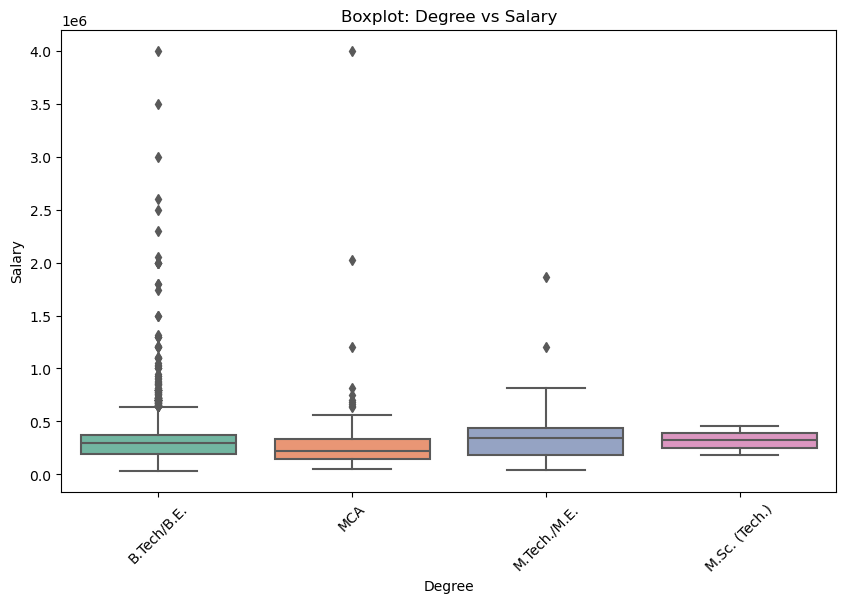

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary', data=df, palette='Set2')
plt.title('Boxplot: Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


#### Insight 5
1. B.Tech/BE have the maximum slary compared to other degrees

#### Relationship between gender and specialization

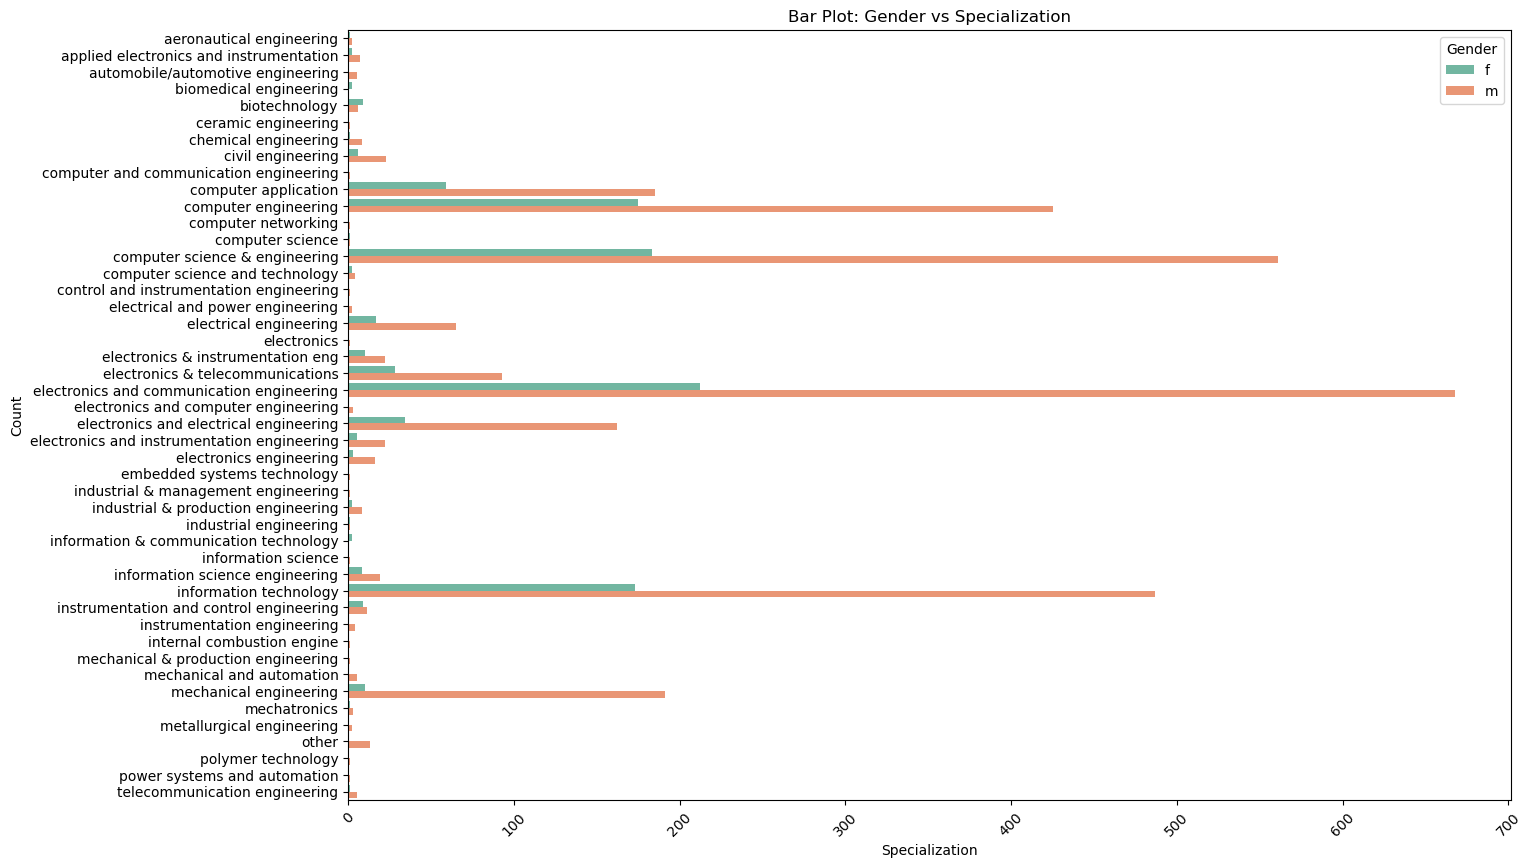

In [75]:
# Creating a crosstab of Gender vs Specialization
crosstab = pd.crosstab(df['Specialization'], df['Gender'])

# Reset the index to use Specialization as a regular column
crosstab = crosstab.reset_index()

# Melting the data for seaborn barplot
crosstab_melt = crosstab.melt(id_vars='Specialization', var_name='Gender', value_name='Count')

# Bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(y='Specialization', x='Count', hue='Gender', data=crosstab_melt, palette='Set2')
plt.title('Bar Plot: Gender vs Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


##### Insight 6
1. Analyzing the plot we can conclude  that female population with highest specializations feild is in electronics and communication engineering whereas they lowest population  in biomedical engineering or zero population  in aeronautical engineering
   

## 6.Does degree and Specializations affect salary?

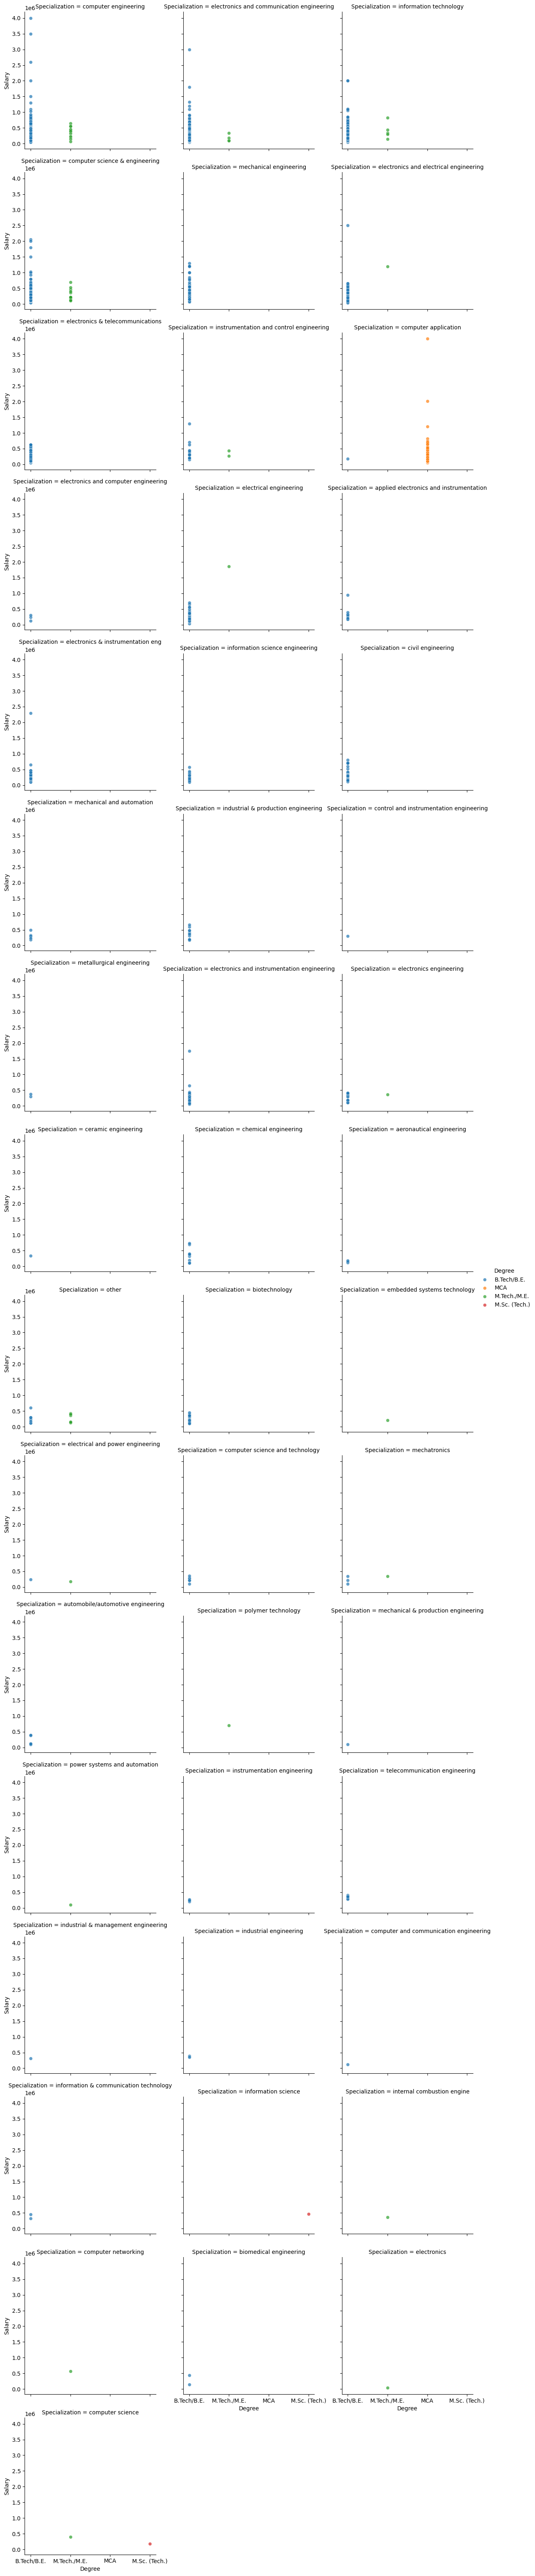

In [76]:
# FacetGrid to see the distribution of salary across degrees and specializations
g = sns.FacetGrid(df, col='Specialization', hue='Degree', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Degree', 'Salary', alpha=.7)
g.add_legend()
plt.show()


#### Insight 7
1. With the degree of B.tech/BE and the specialization of computerengineering /information technology and electronic and communication engineering are getting the most number of jobs and cs specialization are highly paid .

## 7. Testing the Times of India claim:

In [84]:
from scipy import stats
relevant_roles = ['programmer Analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_df = df[df['Designation'].isin(relevant_roles)]
salary_data = filtered_df['Salary']
claimed_mean_salary = 2.75 * 100000  
t_stat, p_value = stats.ttest_1samp(salary_data, claimed_mean_salary)
print(f"Mean Salary of Selected Roles: {salary_data.mean():.2f}")
print(f"Claimed Mean Salary: {claimed_mean_salary:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average salary is significantly different from the claimed mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the average salary and the claimed mean.")


Mean Salary of Selected Roles: 339792.04
Claimed Mean Salary: 275000.00
T-statistic: 10.55
P-value: 0.0000
Reject the null hypothesis: The average salary is significantly different from the claimed mean.


### Insight 8:
The claim by times of india redgarding salry fails as there is significiantly difference in salary than the claimed slary

## Relationship Between Gender and Specialization:

In [85]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)

# Hypothesis:
# Null Hypothesis: There is no relationship between Gender and Specialization (they are independent).
# Alternative Hypothesis: There is a relationship between Gender and Specialization.

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between Gender and Specialization.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Gender and Specialization.")


Chi-Square Statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
Reject the null hypothesis. There is a significant relationship between Gender and Specialization.


#### Insight 9: There is significant relation between Gender and specilization which is observed by chi square test

## 8. Conclusion

### 1. B.tech/BE degree are highest paid degree 
### 2. Specialization in fields like computerscience/information technology and electronic and communication are likely to get more job and highely paid .
### 3. Male population are higher in each feild compared to female population.